**Import Library**

In [21]:
import matplotlib.pyplot as plt # mengimport library matplotlib untuk menampilkan gambar
from skimage import data # mengimport submodule data dari skimage
from skimage.io import imread # mengimport fungsi imread dari module skimage.io untuk membaca gambar
from skimage.color import rgb2gray # mengimport fungsi rgb2gray dari module skimage.color untuk mengubah gambar dari RGB ke grayscale
from skimage.util import invert # mengimport fungsi invert dari module skimage.util untuk membalikkan gambar

import numpy as np # mengimport library numpy sebagai np untuk melakukan operasi numerik


**Percobaan 1 - Cropping Image**

poto1 Ori Shape :  (192, 256, 3)
poto1 Crop Shape :  (192, 192, 3)
poto2 Ori Shape :  (544, 960, 3)
poto2 Crop Shape :  (192, 192, 3)


Text(0.5, 1.0, 'Citra Output 2')

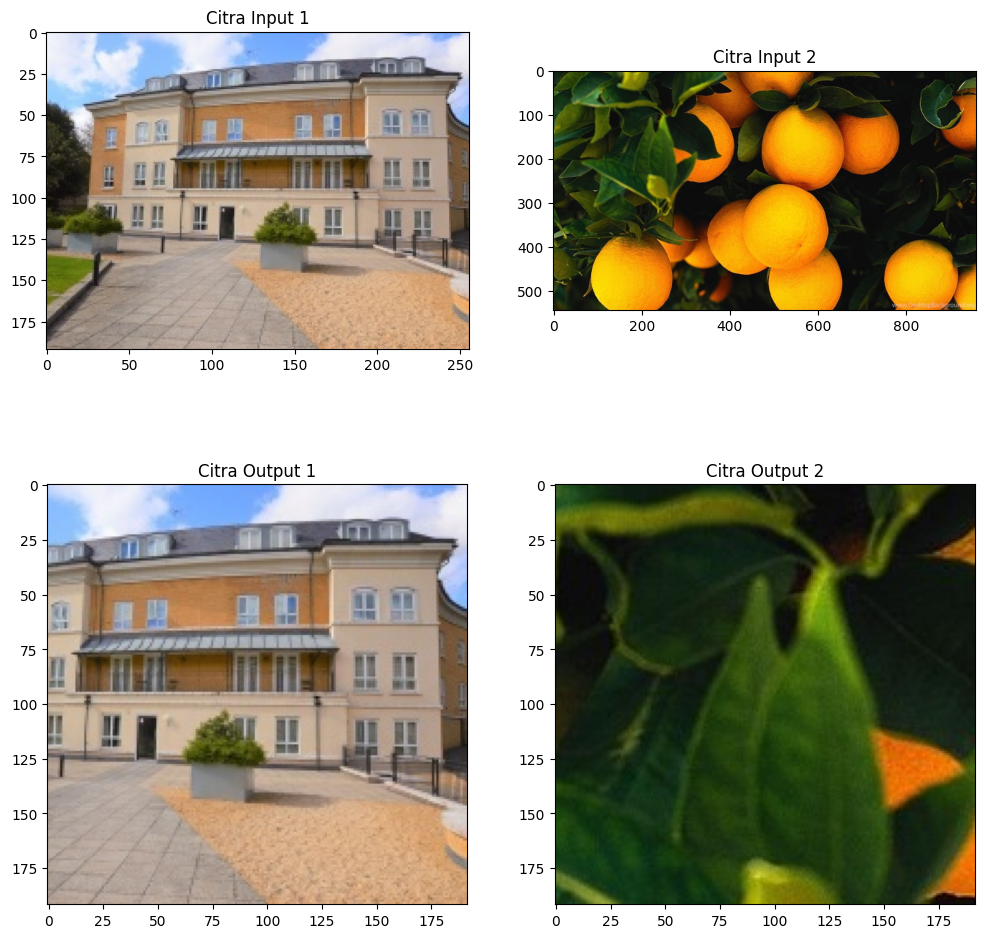

In [22]:
poto1 = plt.imread('Foto.jpg') # memuat gambar 'Foto.jpg' dan menyimpannya dalam variabel 'poto1'
poto2 = plt.imread('orange.jpg') # memuat gambar 'orange.jpg' dan menyimpannya dalam variabel 'poto2'

#membuat salinan gambar asli dan memotong gambar
poto1Cropped = poto1.copy()
poto1Cropped = poto1Cropped[0:256,64:320]

poto2Cropped = poto2.copy()
poto2Cropped = poto2Cropped[64:256,128:320]

#mencetak bentuk gambar asli dan gambar yang sudah dipotong
print('poto1 Ori Shape : ',poto1.shape)
print('poto1 Crop Shape : ',poto1Cropped.shape)

print('poto2 Ori Shape : ',poto2.shape)
print('poto2 Crop Shape : ',poto2Cropped.shape)

#menampilkan gambar asli dan gambar yang sudah dipotong dalam satu plot
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(poto1)
ax[0].set_title("Citra Input 1")

ax[1].imshow(poto2, cmap='gray')
ax[1].set_title('Citra Input 2')

ax[2].imshow(poto1Cropped)
ax[2].set_title("Citra Output 1")

ax[3].imshow(poto2Cropped, cmap='gray')
ax[3].set_title('Citra Output 2')

**Percobaan 2 - Citra Negative**

Shape Input :  (192, 192, 3)
Shape Output :  (192, 192, 3)


Text(0.5, 1.0, 'Histogram Output')

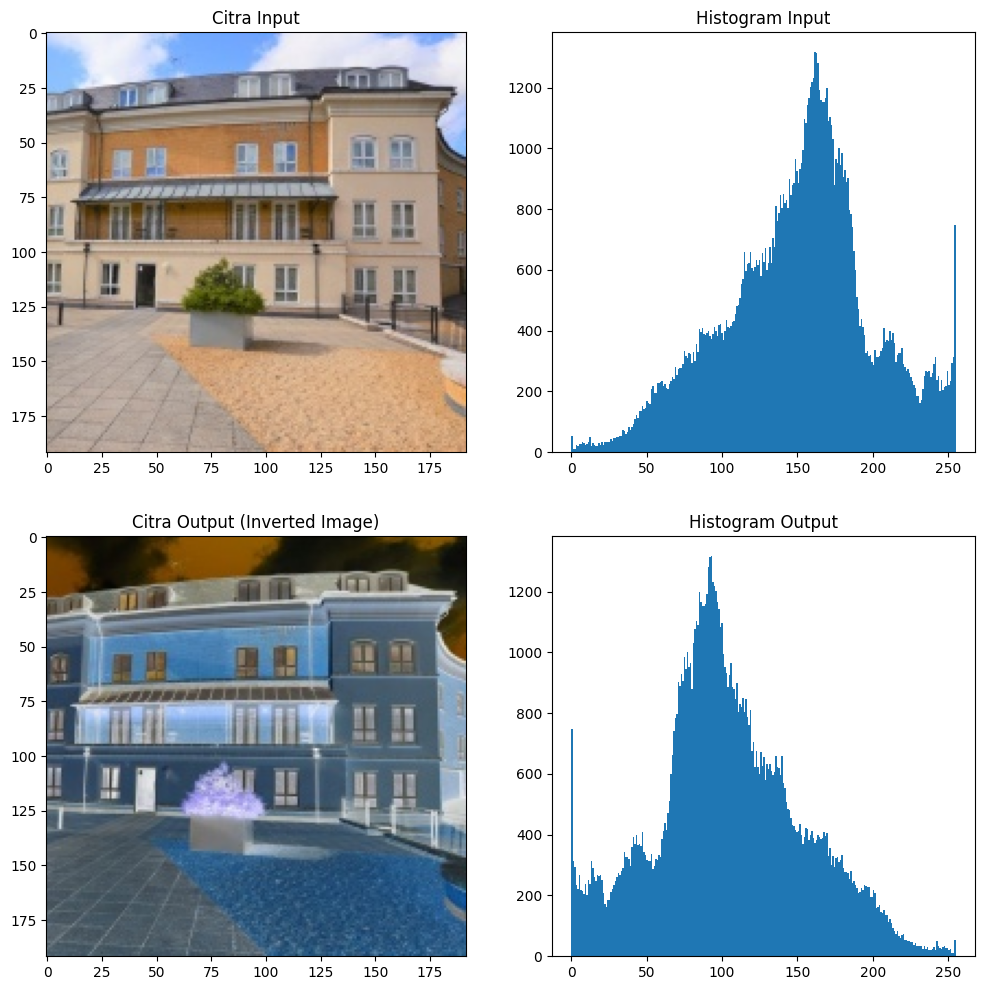

In [23]:
inv = invert(poto1Cropped) # membuat variabel inv yang merupakan hasil invert citra poto1Cropped
print('Shape Input : ', poto1Cropped.shape) #menampilkan dimensi citra asli poto1Cropped
print('Shape Output : ',inv.shape) #menampilkan dimensi citra hasil invert inv

fig, axes = plt.subplots(2, 2, figsize=(12, 12)) #membuat figure dengan ukuran 12x12 dan terdiri dari 2 baris dan 2 kolom
ax = axes.ravel() #mem-flatten axes menjadi array 1 dimensi

ax[0].imshow(poto1Cropped) #menampilkan citra asli poto1Cropped pada subplot pertama
ax[0].set_title("Citra Input") #memberikan judul "Citra Input" pada subplot pertama

ax[1].hist(poto1Cropped.ravel(), bins=256) #menampilkan histogram citra asli poto1Cropped pada subplot kedua
ax[1].set_title('Histogram Input') #memberikan judul "Histogram Input" pada subplot kedua

ax[2].imshow(inv) #menampilkan citra hasil invert inv pada subplot ketiga
ax[2].set_title('Citra Output (Inverted Image)') #memberikan judul "Citra Output (Inverted Image)" pada subplot ketiga

ax[3].hist(inv.ravel(), bins=256) #menampilkan histogram citra hasil invert inv pada subplot keempat
ax[3].set_title('Histogram Output') #memberikan judul "Histogram Output" pada subplot keempat

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Histogram Output')

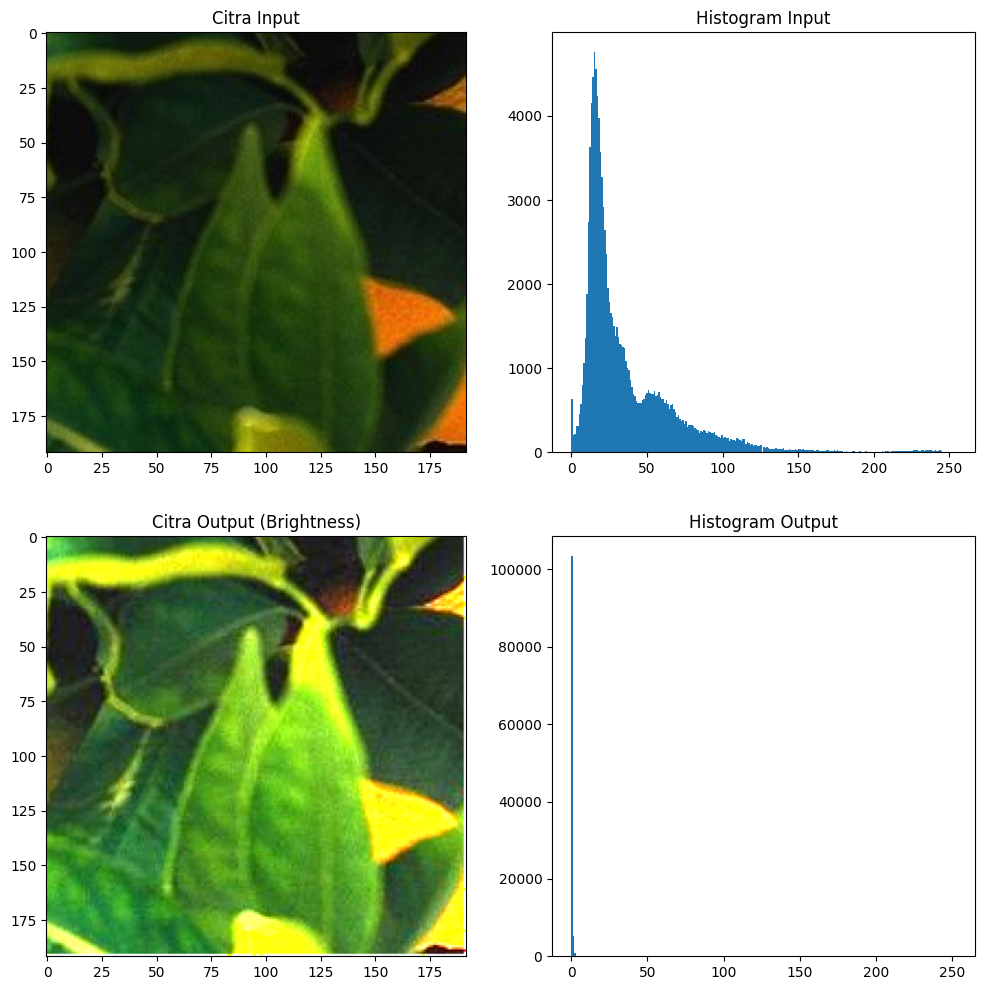

In [24]:
copygambar2 = poto2Cropped.copy().astype(float) #membuat salinan citra 2 yang telah dipotong menjadi grayscale dan mengubah tipe datanya menjadi float

shape = copygambar2.shape #mengambil dimensi citra yang telah disalin pada variabel copygambar2

output1 = np.empty(shape) #membuat variabel kosong output1 dengan dimensi yang sama dengan citra copygambar2

for baris in range(0, shape[0]-1): #loop untuk setiap baris pada citra
    for kolom in range(0, shape[1]-1):#loop untuk setiap kolom pada citra
        a1 = baris #menyimpan nilai baris dan kolom pada variabel a1 dan b1
        b1 = kolom #menyimpan nilai baris dan kolom pada variabel a1 dan b1
        output1[a1, b1] = copygambar2[baris, kolom] / 100 #menghitung nilai pixel baru pada output1 dengan membagi nilai pixel asli pada copygambar2 dengan 100
        
fig, axes = plt.subplots(2, 2, figsize=(12, 12)) # membuat sebuah figure dengan ukuran 12x12 dan dua baris dua kolom subplot
ax = axes.ravel() #membuat plot axis untuk setiap subplot

ax[0].imshow(poto2Cropped, cmap='gray') #menampilkan citra asli pada subplot pertama
ax[0].set_title("Citra Input") #memberi judul pada subplot pertama

ax[1].hist(poto2Cropped.ravel(), bins=256) #menampilkan histogram citra asli pada subplot kedua
ax[1].set_title('Histogram Input') #memberi judul pada subplot kedua

ax[2].imshow(output1, cmap='gray') #menampilkan citra yang telah diubah kecerahannya pada subplot ketiga
ax[2].set_title('Citra Output (Brightness)') #memberi judul pada subplot ketiga

ax[3].hist(output1.ravel(), bins=256) #menampilkan histogram citra yang telah diubah kecerahannya pada subplot keempat
ax[3].set_title('Histogram Output') #memberi judul pada subplot keempat